In [2]:
#Comienzo el programa incorporando las librerias necesarias para su correcto funcionamiento.
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

In [3]:
iteraciones=100000
directory = "H:/Escritorio/Compu/Problema1/Voluntario/Problema1" 

In [4]:
def load_planet_counts(directory, filename):
    # Cargar los conteos de planetas rocosos y gigantes gaseosos desde un archivo en el directorio especificado
    filename = f"{directory}/{filename}"
    with open(filename, 'r') as file:
        num_rocky_planets = int(file.readline().strip())
        num_gas_giants = int(file.readline().strip())
    return num_rocky_planets, num_gas_giants

# Ejemplo de cómo llamar a la función

N_Roc_Ant, N_Gas_Ant = load_planet_counts(directory, 'Numero_Planetas_Antiguos.txt')
N_Roc, N_Gas = load_planet_counts(directory, 'Numero_Planetas_Nuevos.txt')

In [5]:
print("Este fichero analizará los resultados obtenidos para la colisión de los planetesimales. Empezaré analizando el número")
print("de planetas antes y después de colisionar")
print()

print(f"El número de planetas rocosos antes de la colisión es {N_Roc_Ant}\n")
print(f"El número de planetas gaseosos antes la colisión es {N_Gas_Ant}\n")
print()
print(f"El número de planetas rocosos tras la colisión es {N_Roc}\n")
print(f"El número de planetas gaseosos tras la colisión es {N_Gas}\n")

Este fichero analizará los resultados obtenidos para la colisión de los planetesimales. Empezaré analizando el número
de planetas antes y después de colisionar

El número de planetas rocosos antes de la colisión es 10

El número de planetas gaseosos antes la colisión es 90


El número de planetas rocosos tras la colisión es 8

El número de planetas gaseosos tras la colisión es 90



In [6]:
def cargar_datos(directory, filename, N, iteraciones):
    # Construir la ruta completa del archivo usando el directorio y el nombre del archivo
    filepath = f"{directory}/{filename}"
    
    # Inicializar un array tridimensional
    # Dimensiones: [Número de planetas, Coordenadas (2), Número de iteraciones]
    data_array = np.zeros((N, 2, iteraciones))
    
    with open(filepath, 'r') as file:
        for i in range(N):
            for k in range(iteraciones):
                while True:  # Esto manejará cualquier número de líneas vacías, incluso si hay más de una por error
                    linea = file.readline().strip()
                    if linea:  # Solo procesa líneas que no estén vacías
                        coords = list(map(float, linea.split(',')))
                        data_array[i, :, k] = coords
                        break  # Salir del bucle mientras después de procesar una línea válida

    return data_array

r_Roc = cargar_datos(directory, 'r_Roc_New.txt', N_Roc, iteraciones)
r_Gas = cargar_datos(directory, 'r_Gas_New.txt', N_Gas, iteraciones)

In [7]:
def load_values(directory, filename):
    filepath = f"{directory}/{filename}"
    with open(filepath, 'r') as file:
        # Usar list comprehension para crear una lista de flotantes
        value = [float(line.strip()) for line in file if line.strip()]
    
    # Convertir la lista a un array de NumPy y devolverlo
    return np.array(value)

In [10]:
ECal_Roc = load_values(directory, 'energy_calorifica_Roc.txt')
ECal_Gas = load_values(directory, 'energy_calorifica_Gas.txt')

#Desrescalo los valores de la energía
c=1.496*10**11  #m
Ms=2.167*10**31 #Kg
G=6.67384*10**(-11) #m^3 / Kg s^2
t=np.sqrt((c**3)/(G*Ms))

ECal_Roc=ECal_Roc*((c**2*Ms)/(t**2))
ECal_Gas=ECal_Gas*((c**2*Ms)/(t**2))

# Impresión amigable de los valores energéticos
print("A continuación se muestra la energía calorífica de cada planeta. Si no han chocado su energía calorífica será 0.")
print()
for i, energy in enumerate(ECal_Roc, 1):
    print(f"Planeta rocoso {i} tiene energía: {energy:.2e} J")
    print()
print()    
for i, energy in enumerate(ECal_Gas, 1):
    print(f"Planeta gaseoso {i} tiene energía: {energy:.2e} J")
    print()

A continuación se muestra la energía calorífica de cada planeta. Si no han chocado su energía calorífica será 0.

Planeta rocoso 1 tiene energía: 0.00e+00 J

Planeta rocoso 2 tiene energía: 5.25e+36 J

Planeta rocoso 3 tiene energía: 0.00e+00 J

Planeta rocoso 4 tiene energía: 0.00e+00 J

Planeta rocoso 5 tiene energía: 0.00e+00 J

Planeta rocoso 6 tiene energía: 0.00e+00 J

Planeta rocoso 7 tiene energía: 7.43e+36 J

Planeta rocoso 8 tiene energía: 0.00e+00 J


Planeta gaseoso 1 tiene energía: 0.00e+00 J

Planeta gaseoso 2 tiene energía: 0.00e+00 J

Planeta gaseoso 3 tiene energía: 0.00e+00 J

Planeta gaseoso 4 tiene energía: 0.00e+00 J

Planeta gaseoso 5 tiene energía: 0.00e+00 J

Planeta gaseoso 6 tiene energía: 0.00e+00 J

Planeta gaseoso 7 tiene energía: 0.00e+00 J

Planeta gaseoso 8 tiene energía: 0.00e+00 J

Planeta gaseoso 9 tiene energía: 0.00e+00 J

Planeta gaseoso 10 tiene energía: 0.00e+00 J

Planeta gaseoso 11 tiene energía: 0.00e+00 J

Planeta gaseoso 12 tiene energía: 0.

In [11]:
def calcular_distancias_promedio(r):
    N = r.shape[0]  # Número de planetas
    iteraciones = r.shape[2]  # Número de iteraciones
    distancias_promedio = np.zeros(N)

    for i in range(N):
        suma_distancias = 0
        for k in range(iteraciones):
            x, y = r[i, 0, k], r[i, 1, k]
            distancia = np.sqrt(x**2 + y**2)
            suma_distancias += distancia
        distancias_promedio[i] = suma_distancias / iteraciones

    return distancias_promedio

# Calcular distancias promedio
distancias_promedio_rocosos = calcular_distancias_promedio(r_Roc)
distancias_promedio_gaseosos = calcular_distancias_promedio(r_Gas)

# Imprimir las distancias promedio con identificación detallada
for i, distancia in enumerate(distancias_promedio_rocosos):
    print(f"Distancia promedio del planeta rocoso {i} es: {distancia*c/(10**3):.2f} Km")

for i, distancia in enumerate(distancias_promedio_gaseosos):
    print(f"Distancia promedio del planeta gaseoso {i} es: {distancia*c/(10**3):.2f} Km")

Distancia promedio del planeta rocoso 1 es: 37649345.23 Km
Distancia promedio del planeta rocoso 2 es: 11303678.19 Km
Distancia promedio del planeta rocoso 3 es: 22177035.50 Km
Distancia promedio del planeta rocoso 4 es: 14262323.43 Km
Distancia promedio del planeta rocoso 5 es: 16028533.93 Km
Distancia promedio del planeta rocoso 6 es: 692925354982.41 Km
Distancia promedio del planeta rocoso 7 es: 32328738.75 Km
Distancia promedio del planeta rocoso 8 es: 32949430.74 Km
Distancia promedio del planeta gaseoso 1 es: 6179841510.68 Km
Distancia promedio del planeta gaseoso 2 es: 4405407024.32 Km
Distancia promedio del planeta gaseoso 3 es: 12363607803.78 Km
Distancia promedio del planeta gaseoso 4 es: 5041747192.63 Km
Distancia promedio del planeta gaseoso 5 es: 3666212945.32 Km
Distancia promedio del planeta gaseoso 6 es: 5594125254.58 Km
Distancia promedio del planeta gaseoso 7 es: 2600136890.17 Km
Distancia promedio del planeta gaseoso 8 es: 5217394546.86 Km
Distancia promedio del plan

In [12]:
Radio_Roc = load_values(directory, 'Radio_Roc.txt')
Radio_Gas = load_values(directory, 'Radio_Gas.txt')

#Desescalo los valores del radio
Radio_Roc=(Radio_Roc*c)/(10**3)
Radio_Gas=(Radio_Gas*c)/(10**3)


# Cálculo de los tamaños medios
average_size_roc = np.mean(Radio_Roc) 
average_size_gas = np.mean(Radio_Gas)
average_size_all = np.mean(np.concatenate([Radio_Roc, Radio_Gas]))

# Impresión de los tamaños medios
print("Ahora se estudiará el tamaño medio de los planetas:")
print()
print(f"Tamaño medio de todos los planetesimales: {average_size_all:.3e} km")
print()
print(f"Tamaño medio de los planetesimales rocosos: {average_size_roc:.3e} km")
print()
print(f"Tamaño medio de los planetesimales gaseosos: {average_size_gas:.3e} km")

Ahora se estudiará el tamaño medio de los planetas:

Tamaño medio de todos los planetesimales: 2.859e+04 km

Tamaño medio de los planetesimales rocosos: 2.954e+04 km

Tamaño medio de los planetesimales gaseosos: 2.851e+04 km


In [17]:
def clasificar_planet(radi):
    categoria = {'pequeños': 0, 'medianos': 0, 'grandes': 0, 'muy grandes': 0}
    for radio in radi:
        valor=(1/1000)*((3*((3.038*10**28)/(N_Roc_Ant+N_Gas_Ant)))/(4*np.pi*3130))**(1/3)
        if radio <= valor:  
            categoria['pequeños'] += 1
        elif radio < 2*valor :  
            categoria['medianos'] += 1
        elif radio < 8*valor: 
            categoria['grandes'] += 1
        else:  
            categoria['muy grandes'] += 1
    return categoria
Radios_Planet = np.concatenate((Radio_Roc, Radio_Gas))
tamaño = clasificar_planet(Radios_Planet)

# Print the results using the correct variable
for size, count in tamaño.items():
    print(f"Número de planetas {size}: {count}")

Número de planetas pequeños: 96
Número de planetas medianos: 2
Número de planetas grandes: 0
Número de planetas muy grandes: 0


In [20]:
Periodo_Roc = load_values(directory, 'Periodos_Roc.txt')
Periodo_Gas = load_values(directory, 'Periodos_Gas.txt')

# Impresión amigable de los períodos
print("Períodos orbitales de los planetas:")
for i, period in enumerate(Periodo_Roc, 1):
    print(f"Planeta rocoso número {i} tiene un período de {period:.2f} días")
    print()
print()    
for i, period in enumerate(Periodo_Gas, 1):
    print(f"Planeta gaseoso número {i} tiene un período de {period:.2f} días")
    print()

Períodos orbitales de los planetas:
Planeta rocoso número 1 tiene un período de 13.89 días

Planeta rocoso número 2 tiene un período de 2.26 días

Planeta rocoso número 3 tiene un período de 6.30 días

Planeta rocoso número 4 tiene un período de 3.24 días

Planeta rocoso número 5 tiene un período de 3.86 días

Planeta rocoso número 6 tiene un período de 17872.69 días

Planeta rocoso número 7 tiene un período de 10.75 días

Planeta rocoso número 8 tiene un período de 10.58 días


Planeta gaseoso número 1 tiene un período de 10690.10 días

Planeta gaseoso número 2 tiene un período de 17549.74 días

Planeta gaseoso número 3 tiene un período de 30550.66 días

Planeta gaseoso número 4 tiene un período de 147309.05 días

Planeta gaseoso número 5 tiene un período de 10420.97 días

Planeta gaseoso número 6 tiene un período de 12149.35 días

Planeta gaseoso número 7 tiene un período de 6045.72 días

Planeta gaseoso número 8 tiene un período de 8915.09 días

Planeta gaseoso número 9 tiene un per

In [19]:
# Carga de valores de excentricidad para planetas rocosos y gaseosos
ex_Roc = load_values(directory, 'Ex_Roc.txt')
ex_Gas = load_values(directory, 'Ex_Gas.txt')

# Impresión amigable de las excentricidades
print("Información de las excentricidades de los planetas:")
print()
for i, ex in enumerate(ex_Roc, 1):
    print(f"Planeta rocoso número {i} tiene una excentricidad de {ex:.3f}")
    print()
print()
    
for i, ex in enumerate(ex_Gas, 1):
    print(f"Planeta gaseoso número {i} tiene una excentricidad de {ex:.3f}")
    print()

Información de las excentricidades de los planetas:

Planeta rocoso número 1 tiene una excentricidad de 0.081

Planeta rocoso número 2 tiene una excentricidad de 0.078

Planeta rocoso número 3 tiene una excentricidad de 0.024

Planeta rocoso número 4 tiene una excentricidad de 0.037

Planeta rocoso número 5 tiene una excentricidad de 0.061

Planeta rocoso número 6 tiene una excentricidad de 0.984

Planeta rocoso número 7 tiene una excentricidad de 0.212

Planeta rocoso número 8 tiene una excentricidad de 0.324


Planeta gaseoso número 1 tiene una excentricidad de 0.450

Planeta gaseoso número 2 tiene una excentricidad de 0.042

Planeta gaseoso número 3 tiene una excentricidad de 0.270

Planeta gaseoso número 4 tiene una excentricidad de 0.041

Planeta gaseoso número 5 tiene una excentricidad de 0.000

Planeta gaseoso número 6 tiene una excentricidad de 0.300

Planeta gaseoso número 7 tiene una excentricidad de 0.039

Planeta gaseoso número 8 tiene una excentricidad de 0.222

Planeta ga

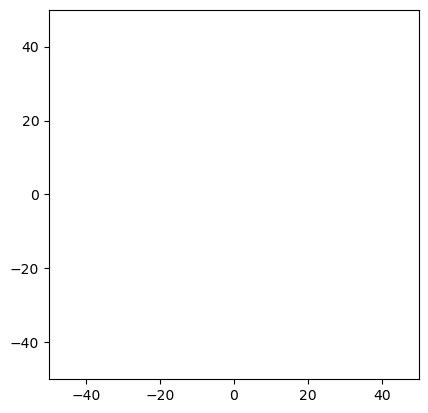

In [11]:
# Carga de valores de masa para planetas rocosos y gaseosos
Masa_Roc = load_values(directory, 'Masa_Roc.txt')
Masa_Gas = load_values(directory, 'Masa_Gas.txt')

# Normalización de las masas para el tamaño de los puntos
size_factor = 3.038e25
sizes_Roc = Masa_Roc / size_factor
sizes_Gas = Masa_Gas / size_factor

# Configuración de la visualización
x_min, x_max, y_min, y_max = -50, 50, -50, 50
interval = 0.01  # Intervalo entre frames en milisegundos
file_out = "animacion_orbitas"  # Archivo de salida para la animación
save_to_file = False  # Controla si se guarda la animación como un archivo
dpi = 150  # Resolución para el archivo de salida

# Crear figura y eje para la animación
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')

# Inicializar puntos y líneas para cada planetesimal
points_Roc = [ax.plot([], [], 'o', color='red', markersize=2 * np.sqrt(size))[0] for size in sizes_Roc]
trails_Roc = [ax.plot([], [], '-', color='red', alpha=0.5)[0] for _ in range(N_Roc)]
points_Gas = [ax.plot([], [], 'o', color='blue', markersize=2 * np.sqrt(size))[0] for size in sizes_Gas]
trails_Gas = [ax.plot([], [], '-', color='blue', alpha=0.5)[0] for _ in range(N_Gas)]

def init():
    # Inicializar los puntos y líneas para ser vacíos al principio
    for point, trail in zip(points_Roc + points_Gas, trails_Roc + trails_Gas):
        point.set_data([], [])
        trail.set_data([], [])
    return points_Roc + trails_Roc + points_Gas + trails_Gas

def update(frame):
    # Actualizar la posición de cada planetesimal y su estela
    for i in range(N_Roc):
        points_Roc[i].set_data([r_Roc[i][0][frame]], [r_Roc[i][1][frame]])
        xdata, ydata = trails_Roc[i].get_data()
        trails_Roc[i].set_data(np.append(xdata, r_Roc[i][0][frame]), np.append(ydata, r_Roc[i][1][frame]))
        
    for i in range(N_Gas):
        points_Gas[i].set_data([r_Gas[i][0][frame]], [r_Gas[i][1][frame]])
        xdata, ydata = trails_Gas[i].get_data()
        trails_Gas[i].set_data(np.append(xdata, r_Gas[i][0][frame]), np.append(ydata, r_Gas[i][1][frame]))

    return points_Roc + trails_Roc + points_Gas + trails_Gas

# Crear y ejecutar la animación
animation = FuncAnimation(fig, update, frames=iteraciones, init_func=init, blit=True, interval=interval)

if save_to_file:
    animation.save(f"{file_out}.mp4", dpi=dpi)
else:
    plt.show()